In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [24]:
bullets = 10
entropies = []
for real in range(0,11):
    fake = bullets-real
    data = ['r'] * real + ['f']*fake
    items,counts = np.unique(data,return_counts=True)
    p = counts/len(data)
    entropies.append(np.sum(-p*np.log(p)))

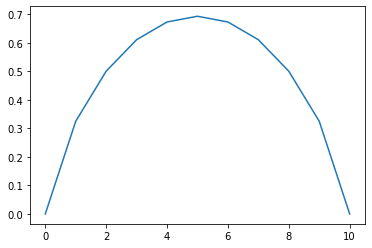

In [25]:
plt.plot(entropies)

In [26]:
data = pd.read_csv("../datasets/titanic/train.csv")
mod = data.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
mod["Sex"] = LabelEncoder().fit_transform(mod["Sex"])
mod_full = mod.dropna()
mod_blank = mod.loc[mod["Age"].isna()]
table = mod_full.groupby(["Sex", "Pclass"]).mean()[["Age"]].reset_index()

In [27]:
def fillAge(row):
    row["Age"] = table.loc[(table["Sex"] == row["Sex"]) &(table["Pclass"] == row["Pclass"])].iloc[0]["Age"]
    return row

mod_filled = mod_blank.apply(fillAge, axis=1)

In [31]:
total = pd.concat([mod_full, mod_filled])
X = total.drop(["Survived"], axis=1)
y = total["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
def entropy(columns):
    items,counts = np.unique(columns,return_counts=True)
    p = counts/len(columns)
    return np.sum(-p*np.log(p))

In [33]:
def info_gain(X,y,columns):
    pivot = X[columns].mean()
    X_left = X[columns] < pivot
    X_right = X[columns] >= pivot
    y_left,y_right = y.loc[X_left],y.loc[X_right]
    p_left,p_right = len(y_left)/len(y),len(y_right)/len(y)
    return entropy(y)-p_left*entropy(y_left)-p_right*entropy(y_right)

In [37]:
for col in X.columns:
    print(col,info_gain(X,y,col))

Pclass 0.05253613916173083
Sex 0.15087048925218172
Age 0.0007663481843047659
SibSp 0.006643498134917131
Parch 0.010661126611803101
